In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/loan_data.csv")

df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


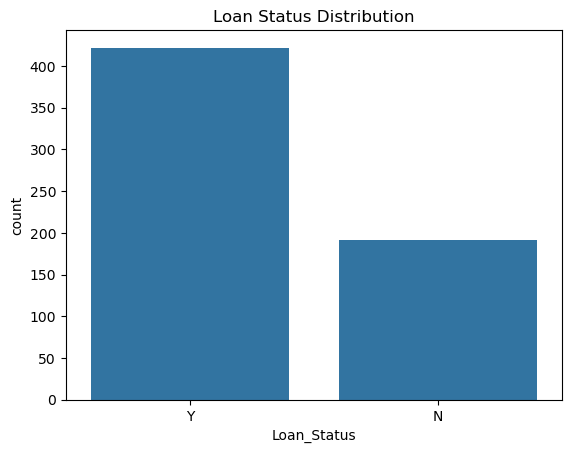

In [4]:
sns.countplot(x="Loan_Status", data=df)
plt.title("Loan Status Distribution")
plt.show()


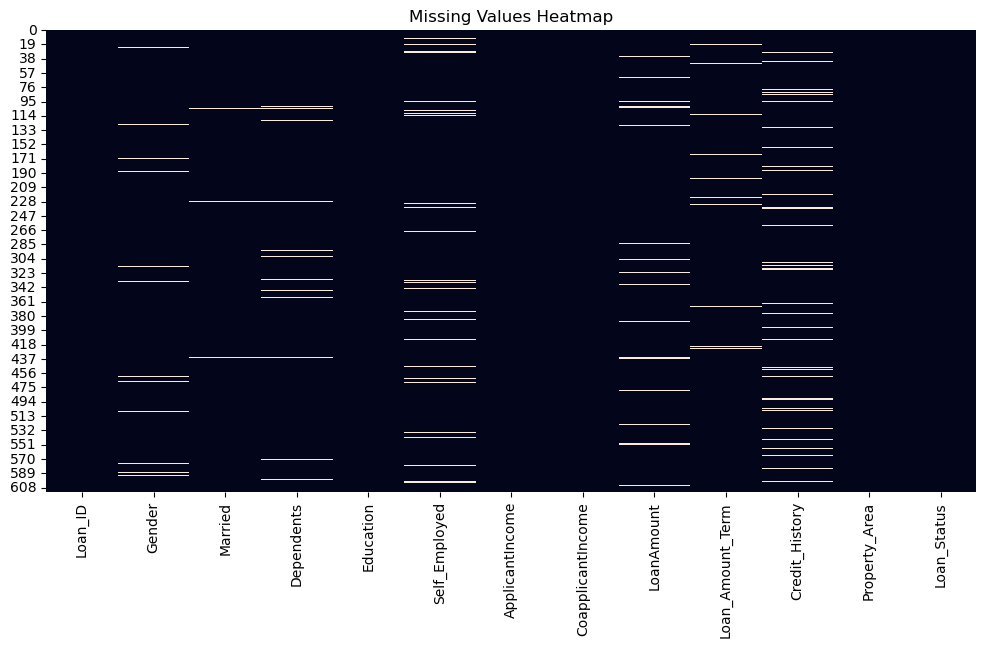

In [5]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

df = pd.read_csv("../data/loan_data.csv")


In [7]:
y = df["Loan_Status"]

X = df.drop("Loan_Status", axis=1)

if "Loan_ID" in X.columns:
    X = X.drop("Loan_ID", axis=1)


In [8]:
y = LabelEncoder().fit_transform(y)


In [9]:
cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns


In [10]:
X[cat_cols] = SimpleImputer(strategy="most_frequent").fit_transform(X[cat_cols])
X[num_cols] = SimpleImputer(strategy="median").fit_transform(X[num_cols])


In [11]:
for col in cat_cols:
    X[col] = LabelEncoder().fit_transform(X[col])


In [12]:
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])


In [13]:
X.isnull().sum()


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [14]:
import pandas as pd
import joblib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


In [15]:
df = pd.read_csv("../data/loan_data.csv")


In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

y = df["Loan_Status"]
X = df.drop("Loan_Status", axis=1)

if "Loan_ID" in X.columns:
    X = X.drop("Loan_ID", axis=1)

y = LabelEncoder().fit_transform(y)

cat_cols = X.select_dtypes(include="object").columns
num_cols = X.select_dtypes(exclude="object").columns

X[cat_cols] = SimpleImputer(strategy="most_frequent").fit_transform(X[cat_cols])
X[num_cols] = SimpleImputer(strategy="median").fit_transform(X[num_cols])

for col in cat_cols:
    X[col] = LabelEncoder().fit_transform(X[col])

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [18]:
models = {
    "logistic": LogisticRegression(max_iter=3000),
    "decision_tree": DecisionTreeClassifier(max_depth=6, random_state=42),
    "random_forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "xgboost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss",
        random_state=42
    )
}


In [19]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    
    joblib.dump(model, f"../saved_models/{name}.pkl")
    
    print(f"{name} accuracy: {acc:.4f}")


logistic accuracy: 0.8618
decision_tree accuracy: 0.8293
random_forest accuracy: 0.8374
xgboost accuracy: 0.8293


In [20]:
pd.DataFrame(
    {"Model": results.keys(), "Accuracy": results.values()}
).sort_values(by="Accuracy", ascending=False)


,Model,Accuracy
0,logistic,0.861789
2,random_forest,0.837398
1,decision_tree,0.829268
3,xgboost,0.829268


In [21]:
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, roc_curve, auc


In [22]:
model_names = ["logistic", "decision_tree", "random_forest", "xgboost"]


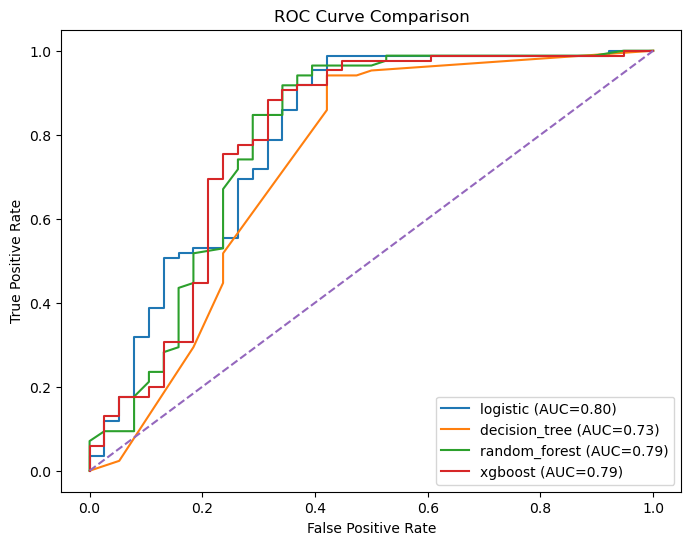

In [23]:
plt.figure(figsize=(8,6))

for name in model_names:
    model = joblib.load(f"../saved_models/{name}.pkl")
    probs = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")

plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


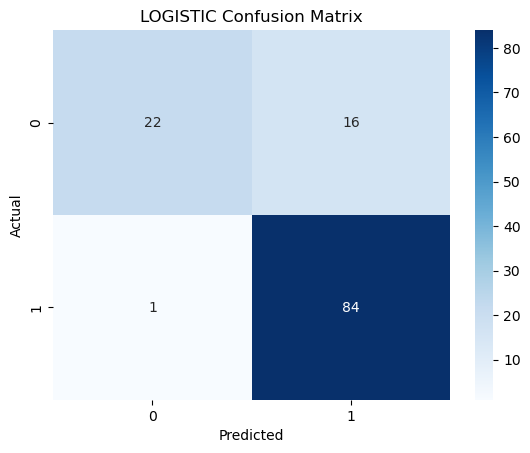

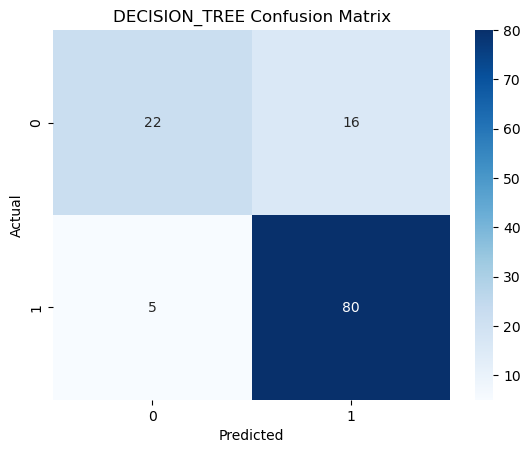

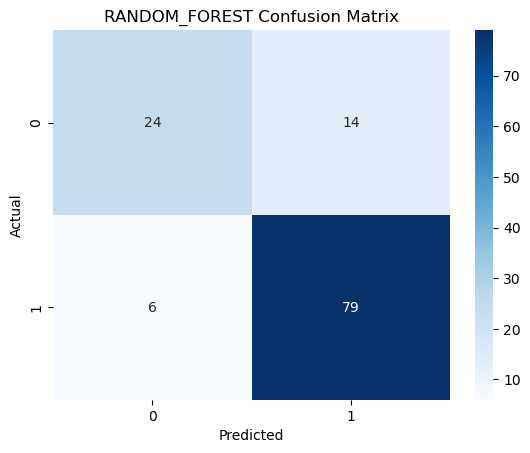

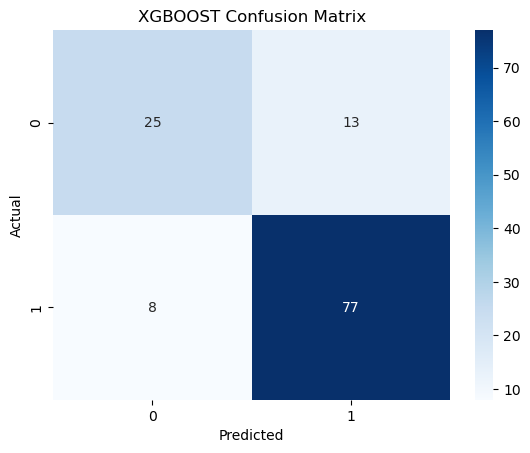

In [24]:
for name in model_names:
    model = joblib.load(f"../saved_models/{name}.pkl")
    preds = model.predict(X_test)
    
    cm = confusion_matrix(y_test, preds)
    
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name.upper()} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
